<h1 align="center">MSIN0097: Predictive Analytics.</h1>
<h1 align="center">Individual Coursework. An end to end machine learning project with Spotify.

</h1>
<h1 align="center">Word Count:1996.</h1>

<h3 align="center"> MSc Business Analytics, University College London.</h3>
<h3 align="center"> March, 2022.</h3>

<h3 align="center"> Follow the link for the online repository:  </h3>

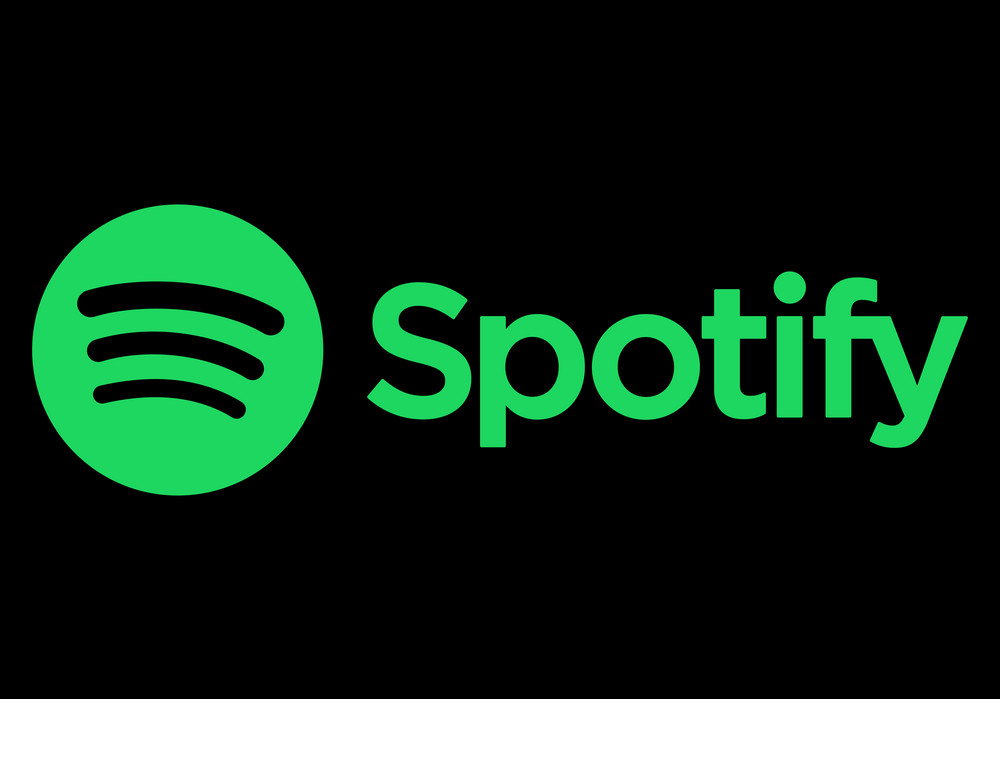

### Table of Contents.

* [Part 1](#Part1): Business understanding; looking at the big picture.


* [Part 2](#Part2): Obtain a dataset and explain the problem you are trying to solve.


* [Part 3](#Part3): Explore the data to gain insights.


* [Part 4](#Part4): Looking for correlations.
   
   
* [Part 5](#Part5): Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.


* [Part 6](#Part6): Explore different models and shortlist the best ones.


* [Part 7](#Part7): Fine-tuning of potential models.


* [Part 8](#Part8): Present your final solution with any summary conclusions.


* [References](#References)


* [Appendix](#Appendix)

In [1]:
# Set up autosaving every 2 minutes
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."
%autosave 120

Autosaving every 120 seconds


In [2]:
!pip install lightgbm
!pip install xgboost


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.


         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.       

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
import os
from numpy import nan as NA
import datetime
import calendar
import plotly.express as px 
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from numpy import percentile
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import joblib
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform 
from scipy.stats import randint
from sklearn.metrics import roc_auc_score
from scipy import stats
from sklearn.pipeline import FeatureUnion
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import VotingRegressor
pd.options.mode.chained_assignment = None

### [Part 1](#Part1): Business understanding; looking at the big picture.

This report will adress a ML problem from the perspective of a data scientist at Spotify. During a briefing, our boss explains that the main objective is to identify song features that are most influential to increasing an artist's popularity. Thus, it is determined that this report will address a predictive analytics task, from which Spotify may effectively target new music for predictive fulfilment. As a result, Spotify would be able to retain existing user engagement as well as gain additional exposure to growing artists, by effectively targeting new music to consumers desired tastes. It is explained that the model will be implemented into the existing Kubeflow pipeline, so it would be beneficial to use Scikit-learn or XGBoost packages where appropriate to maintain continuity. Currently there are two main issues; continuous maintenance and reapplication of models for forecasting user behaviour and finding the balance between ML and non ML methods (Edmunson. A, 2021). It may therefore be useful to train a model to predict a track's popularity using historical data of track attributes and their perceieved popularity. This report will comprise of initial EDA, followed by pre-processing such as feature scaling and outlier removal methods. From there, cross validation will be performed to shortlist some potential models, and after some fine tuning, a final model will be proposed.

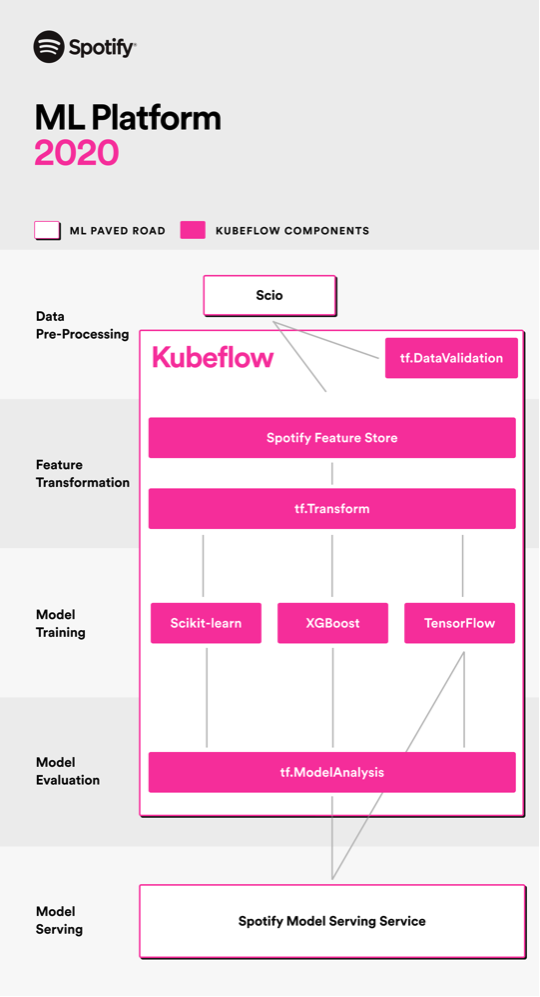

(Baer J and Ngahane S, 2019)

### [Part 2](#Part2): Obtain a dataset and explain the problem you are trying to solve.

The following dataset was extracted from Kaggle via the link, https://www.kaggle.com/vatsalmavani/music-recommendation-system-using-spotify-dataset/data and features were scraped from Spotify's API. The data consists of over 500,000 rows of song data from as early as 1900 to 2021, with features such as key, mode and time signature. The variable of interest, popularity varies on a scale from 1 to 100, such that makes clear that this will be a supervised regression task. As we want to determine what variables are most influential to popularity, we will include all features in the model, making this a multiple regression problem. Batch learning will be used due to the nature of the project that is to make a predictive model for song popularity, reducing the constant need for updating, therefore there will be no need to frequently adjust to new data.

In [4]:
#load the data
path = '/project/'
file = 'tracks.csv'
def load_data(data_path=path):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path)
df = load_data()
print('Number of observations:', len(df))
df.head()

Number of observations: 586672


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


### [Part 3](#Part3): Explore the data to gain insights.

In [5]:
#initial glance at the data at hand
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [6]:
df['key'].value_counts()

# Find the variable has values from 0 to 11. It may be useful to obtain a variables identifier table from the datasource (see appendix).

0     74950
7     73779
2     66552
9     65128
5     53614
4     48220
1     41736
11    39132
10    37710
8     33460
6     30856
3     21535
Name: key, dtype: int64

In [7]:
df['mode'].value_counts()
df['explicit'].value_counts()
# These are binary variables i.e. outputs of 0 or 1.

0    560808
1     25864
Name: explicit, dtype: int64

In [8]:
df['time_signature'].value_counts()

# Outputs are 0 to 4. From further research it is determined that the scale is wrong, so this variable will be transformed.

4    503808
3     64523
5     11400
1      6604
0       337
Name: time_signature, dtype: int64

There are 586,671 instances such that is a sufficently large enough dataset for machine learning purposes. The majority of the data is numerical with the exceptions of id, name, artists, artists id and release date. There are 4 categorical attributes; key, mode, time signature, explicit. Binary variables are both explicit and mode. Non binary categorical variables are key, which ranges from 0 to 11. It is then determined that although time signature here ranges from 1 to 5, it is intended to range from 3 to 7, indicating time signatures of "3/4", to "7/4", therefore this feature will be cleaned.

In [9]:
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


Key findings:

- 25% of tracks have popularity lower than 13/100. 
- 50% have popularity lower than 27/100. 
- 75% of tracks have popularity lower than 41/100. 
- Mean popularity is lower than expected; 27.5/100.

Issues to be addressed:

- Mean and 50% percentile do not match up for mode, speechiness, instrumentalness and liveness, suggesting there are some outliers here. 
- Time signature has the same result for quartiles 1, 2 and 3. 
- The instrumentalness, explicit, loudness and speechiness variables have a standard deviation greater than their mean, such that implies data points are not centred around the mean. 

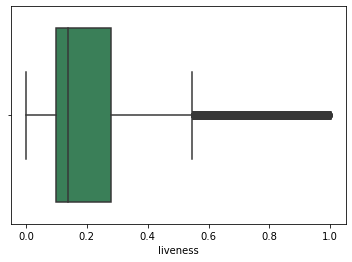

In [10]:
# visualising whether our assumptions are true i.e. whether there are any outliers for liveness, speechiness and loudness
sns.boxplot(x=df['liveness'],color='seagreen')
plt.savefig('liveness_boxplot.png')

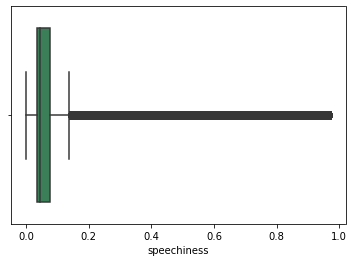

In [11]:
sns.boxplot(x=df['speechiness'],color='seagreen')
plt.savefig('speechiness_boxplot.png')

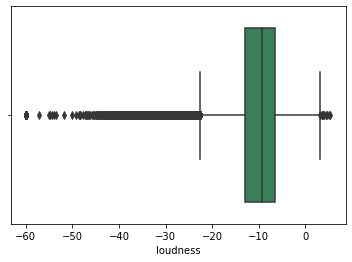

In [12]:
sns.boxplot(x=df['loudness'],color='seagreen')
plt.savefig('loudness_boxplot.png')

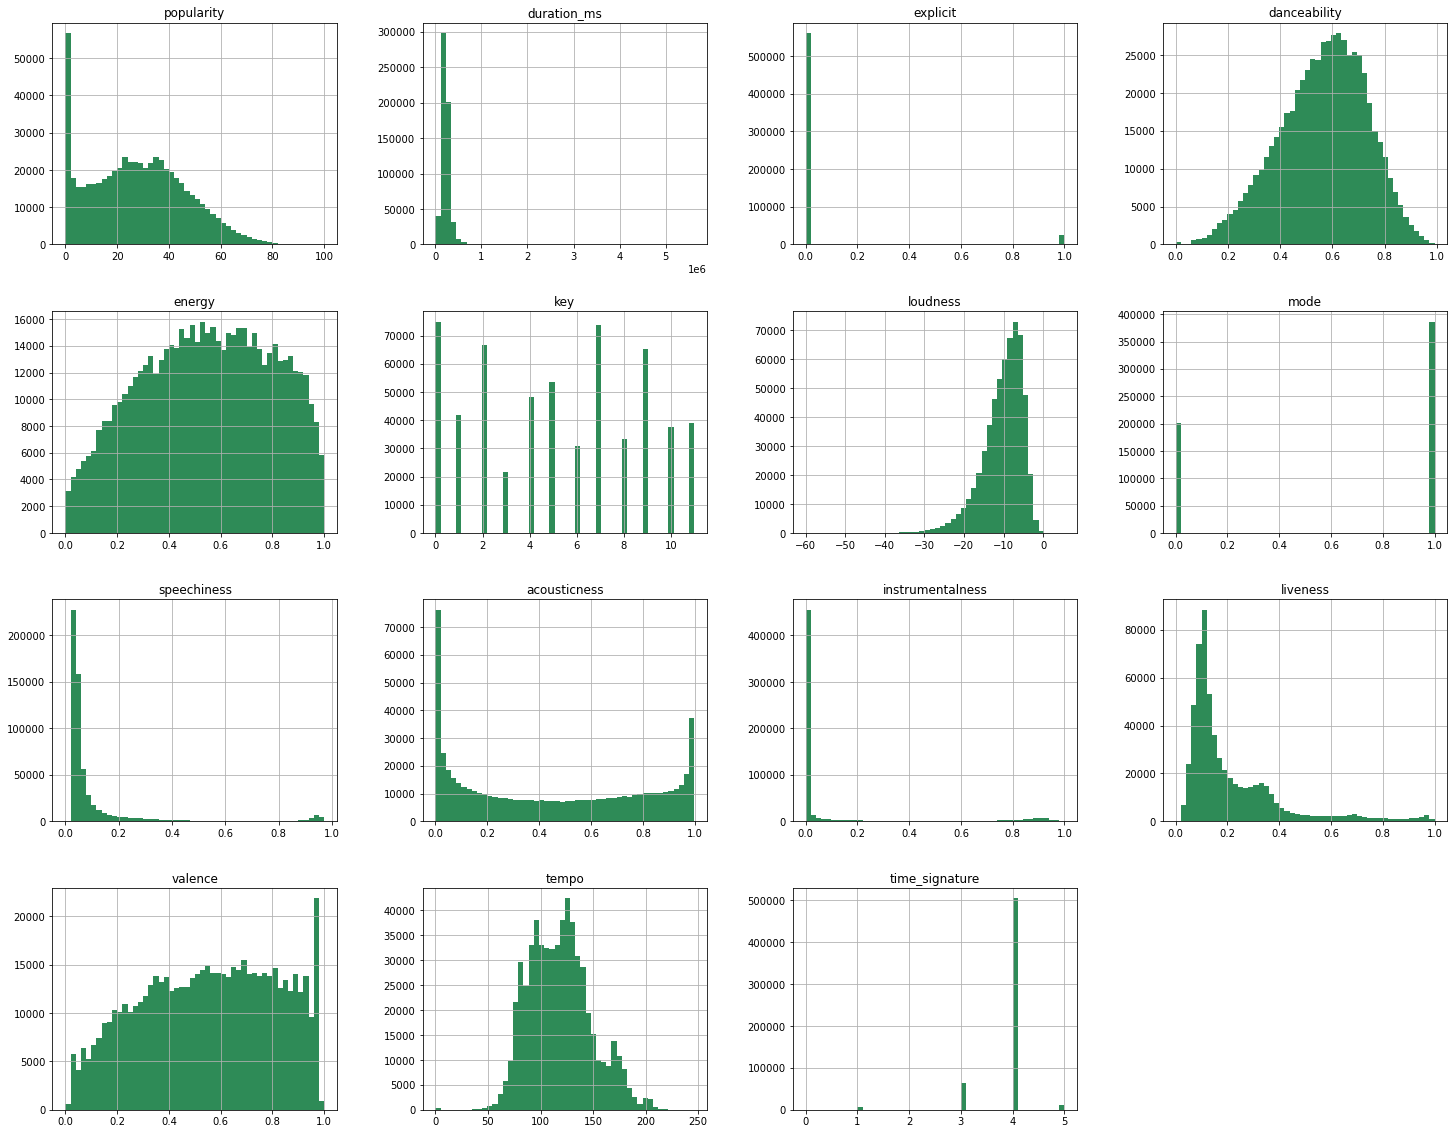

In [13]:
df.hist(bins=50, figsize=(25,20),color='seagreen')
plt.savefig('df_distributions.png')
plt.show()

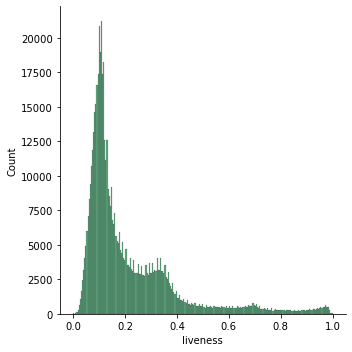

In [14]:
# looking at the distribution of liveness which is highly skewed
liveness_dist = sns.displot(df.liveness,color='seagreen')
plt.savefig('liveness_dist.png')
plt.show()

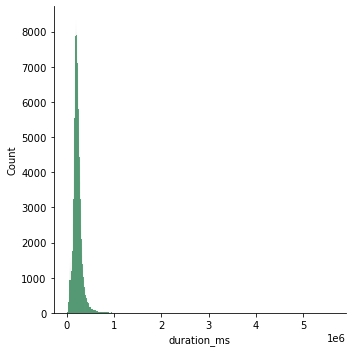

In [15]:
# looking at the distribution of duration_ms which is highly skewed
duration_dist = sns.displot(df.duration_ms,color='seagreen')
plt.savefig('duration_dist.png')
plt.show()

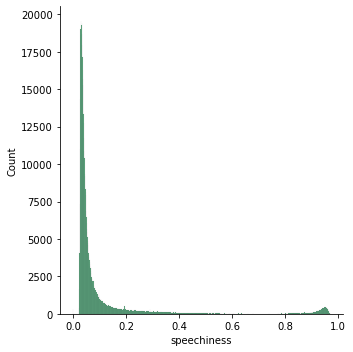

In [16]:
# looking at the distribution of speechiness which is highly skewed
speech_dist = sns.displot(df.speechiness,color='seagreen')
plt.savefig('speechiness_dist.png')
plt.show()

The above histograms are quite tail heavy, whereby their distribution extends far to the right of the median, such may also be referred to as positively skewed, It is important to mitigate this by taking a logarithm so that patterns in the data can effectively be detected later on.

In [17]:
print(df['liveness'].skew())
print(df['duration_ms'].skew())
print(df['speechiness'].skew())

# there is a high level of skewness, which are far greater than 1 following standard normal distribution
# they are positively skewed so a log transformation will be taken in the pre-processing stage

2.044802292506265
10.32562214681148
3.6939505506862607


In [18]:
# Making a new binary variable for popularity whereby a track is popular if larger than 50% popularity and unpopular if smaller than 50%.

df['popular'] = np.where(df['popularity'] > 50, 1, 0)
df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popular
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,0


In [19]:
# Finding artists with largest number of popular songs
popular = df[df.popular == 1]
popular.groupby('artists').sum()['popular'].sort_values(ascending=False).head(20)

artists
['Taylor Swift']             306
['BTS']                      198
['The Beatles']              177
['Queen']                    127
['Metallica']                120
['Lana Del Rey']             114
['Luis Miguel']              114
['Eminem']                   114
['Pink Floyd']               106
['Arctic Monkeys']            96
['One Direction']             96
['PNL']                       95
['Ricardo Arjona']            90
['Drake']                     90
['Michael Jackson']           89
['Linkin Park']               88
['Nirvana']                   83
['Red Hot Chili Peppers']     81
['Rihanna']                   80
['Fleetwood Mac']             75
Name: popular, dtype: int64

In [20]:
df.artists.nunique()
df.artists[df.popular == 1].nunique() 

27527

In [21]:
(22023/586672) * 100
# Out of entire dataset, only 4% of artists are popular. This may need addressing as there may be some missing values.

3.753886328306107

In [22]:
# dropping the popular column as we will use continuous variable of popularity as y
# to address a regression rather than classification problem
df = df.drop(columns=['popular'])

### [Part 4](#Part4): Looking for correlations.

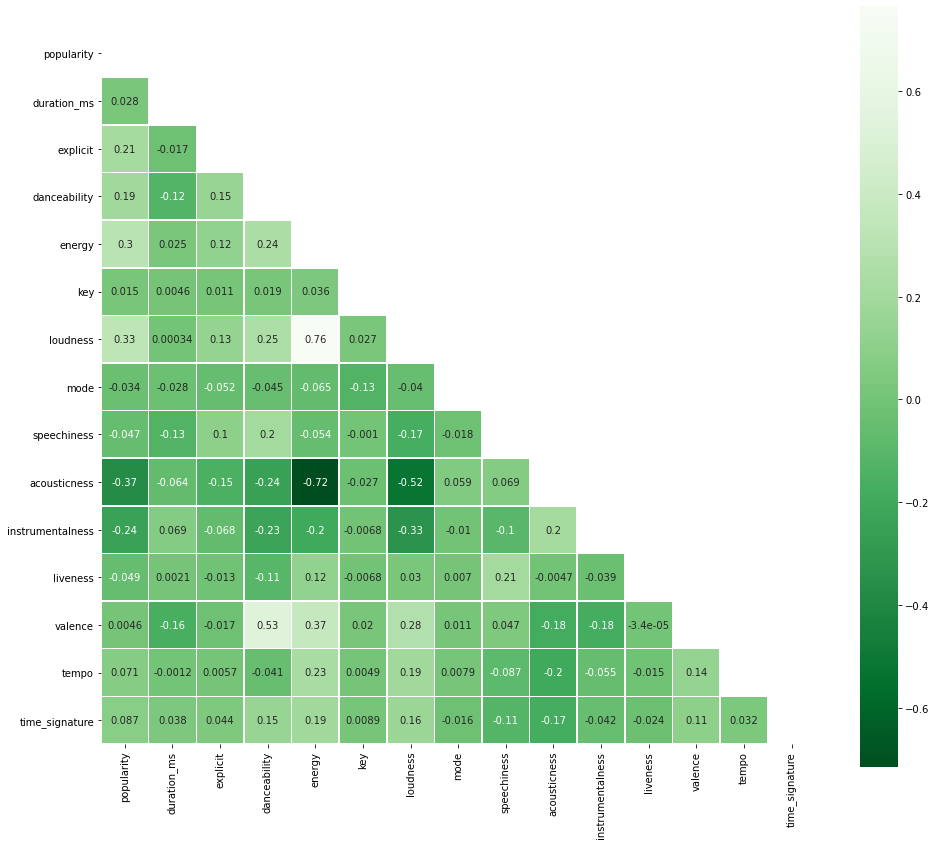

In [23]:
# creating a correlation table to better visualise trends in the data 

df_copy = df.copy()
corr_table = df_copy.corr()

# create mask
mask = np.zeros_like(corr_table, dtype=np.bool)
mask[np.triu_indices_from(mask, k=0)] = True

# generate colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# initialise figure
f, ax = plt.subplots(figsize=(16, 14))

# draw heatmap
sns.heatmap(corr_table, mask=mask, cmap='Greens_r', center=0, 
            annot=True, square=True, linewidths=.5) 

plt.savefig('correlations.png')
# show figure
plt.show()

#heatmap for the provided features 
# most positively correlated variables are energy, explicit, danceability and loudness
# tempo and time signature are slightly positively correlated

In [24]:
corr_matrix = df.corr()
corr_matrix["popularity"].sort_values(ascending=False)
#Correlation matrix for the outcome of interest (popularity) describes the most influential variables to be loudness, energy, explicit and danceability.

popularity          1.000000
loudness            0.327028
energy              0.302315
explicit            0.211758
danceability        0.187000
time_signature      0.086759
tempo               0.071364
duration_ms         0.027681
key                 0.015299
valence             0.004643
mode               -0.033655
speechiness        -0.047357
liveness           -0.048740
instrumentalness   -0.236487
acousticness       -0.370882
Name: popularity, dtype: float64

In [25]:
df['year'] = pd.DatetimeIndex(df['release_date']).year

df['month'] = pd.DatetimeIndex(df['release_date']).month

df['month']=[calendar.month_abbr[int(i)] if pd.notna(i) else i for i in df['month']]

df = df.drop(labels=['id','id_artists','release_date'],axis=1)

df.head()
# make seperate year and month column for easier analysis and comparison 

,name,popularity,duration_ms,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
0,Carve,6,126903,0,['Uli'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3,1922,Feb
1,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1,1922,Jun
2,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5,1922,Mar
3,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3,1922,Mar
4,Lady of the Evening,0,163080,0,['Dick Haymes'],0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4,1922,Jan


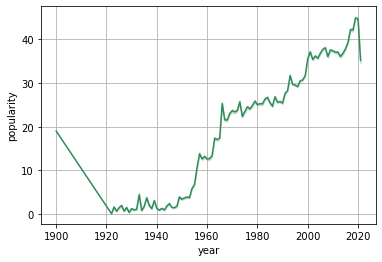

In [26]:
# popularity clearly increases exponentially with time
sns.lineplot(x="year",y="popularity", data=df,color='seagreen')
plt.grid()
plt.savefig('popularity_over_time.png')
plt.show()

In [27]:
graph = df[df['year'] >= 2010]
# only including track releases from 2010 for visualisation purposes

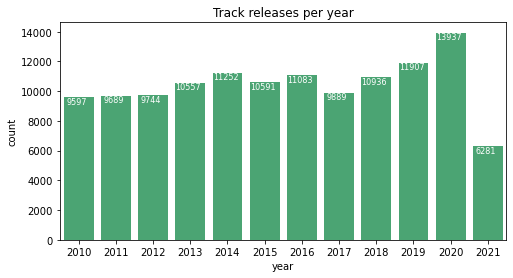

In [28]:
plt.figure(figsize=(8,4))
plt.title('Track releases per year')
bar = sns.countplot(x=graph['year'],color='mediumseagreen')

plt.savefig('track_releases_per_year.png')

for p in bar.patches:
    bar.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+20), ha='center', va='top', color='white', size=8)
plt.show()

# some initial insights into the data such as number of tracks per year 
#Generally a steady trend of track releases, until 2020 to 2021 where there is a significant drop. This may be due to the affects of the Covid-19 pandemic.

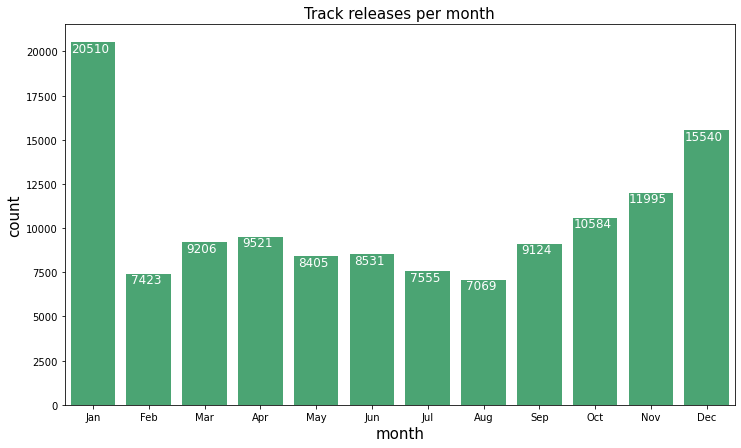

In [29]:
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(12,7))
plt.title('Track releases per month',size=15)
plt.xlabel('xlabel', fontsize=15)
plt.ylabel('ylabel', fontsize=15)
bar = sns.countplot(x=graph['month'],order=Months, color='mediumseagreen')

plt.savefig('track_releases_per_month.png')

for p in bar.patches:
    bar.annotate('{}'.format(p.get_height()), (p.get_x()+.35, p.get_height()+20), ha='center', va='top', color='white', size=12)
    
plt.show()
# additional visualisations for tracks per month to find any seasonal trends
#Find that track releases are predominantly in January and then increase further towards the end of the year.

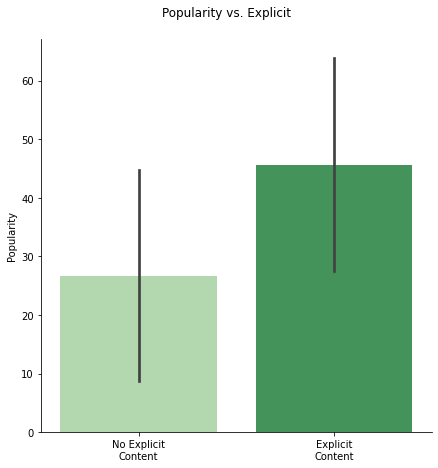

In [30]:
# determining the relationship between popularity and explicit binary variable
exp_data = sns.catplot(data=df, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd", palette='Greens',
                        height=6)
exp_data.fig.suptitle('Popularity vs. Explicit', y=1.05)
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.savefig('popularity_vs_explicit.png')
plt.show()

# we find that there tends to be more popular songs that are explicit

### [Part 5](#Part5): Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.

In [31]:
df.isnull().sum()
#There are no missing values for the vast majority of the dataset features, however there are 71 missing song names. 
#As this is a non numeric variable and we cannot fill these null values with a mean, we will not include this feature in our machine learning model. 
#This feature is not entirely important and we will instead associate the songs with their various music artists.

name                71
popularity           0
duration_ms          0
explicit             0
artists              0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
year                 0
month                0
dtype: int64

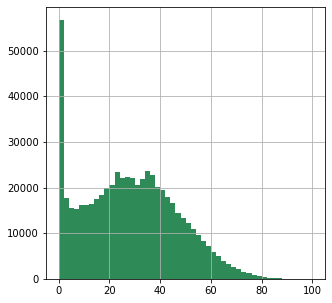

In [32]:
df['popularity'].hist(bins=50, figsize=(5,5),color='seagreen')
plt.savefig('popularity_uncleaned_dist.png')
plt.show()

# there are over 50,000 values with 0 popularity, perhaps due to data collection error
# we must remove these to mitigate any misrepresentation in our model

In [33]:
df_cleaned=df[df['popularity']!=0]

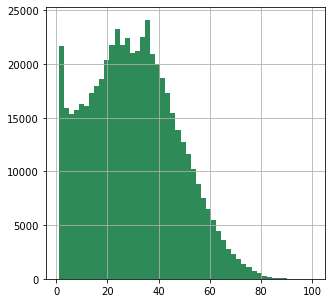

In [34]:
df_cleaned['popularity'].hist(bins=50, figsize=(5,5),color='seagreen')
plt.savefig('popularity_dist.png')
plt.show()

In [35]:
# duration is in milliseconds so divide this column by 1000 to get time in seconds 
df_cleaned['duration_ms']=(df_cleaned['duration_ms']/1000).round(1)
df_cleaned.head()

,name,popularity,duration_ms,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
0,Carve,6,126.9,0,['Uli'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.151,0.127,104.851,3,1922,Feb
13,Tu Verras Montmartre,1,186.8,0,['Lucien Boyer'],0.703,0.2800,0,-15.390,1,0.1740,0.995,0.000068,0.163,0.897,127.531,4,1922,Jan
26,Nuits De Chine,4,180.8,0,['Louis Lynel'],0.420,0.2880,7,-14.005,1,0.0701,0.994,0.000216,0.196,0.400,139.575,3,1922,Jan
149,Nobody Knows You When You're Down and Out,41,177.1,0,['Bessie Smith'],0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.183,0.211,89.822,4,1923,Jan
150,Weather Bird,38,161.9,0,"['Louis Armstrong', 'Earl Hines']",0.831,0.2620,8,-12.386,1,0.0942,0.984,0.912000,0.204,0.901,104.606,4,1923,Jan


In [36]:
df_cleaned['time_signature'] = (df_cleaned['time_signature']+2)
df_cleaned.head()
# Ensuring time signature is on correct scale.

,name,popularity,duration_ms,explicit,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,year,month
0,Carve,6,126.9,0,['Uli'],0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.151,0.127,104.851,5,1922,Feb
13,Tu Verras Montmartre,1,186.8,0,['Lucien Boyer'],0.703,0.2800,0,-15.390,1,0.1740,0.995,0.000068,0.163,0.897,127.531,6,1922,Jan
26,Nuits De Chine,4,180.8,0,['Louis Lynel'],0.420,0.2880,7,-14.005,1,0.0701,0.994,0.000216,0.196,0.400,139.575,5,1922,Jan
149,Nobody Knows You When You're Down and Out,41,177.1,0,['Bessie Smith'],0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.183,0.211,89.822,6,1923,Jan
150,Weather Bird,38,161.9,0,"['Louis Armstrong', 'Earl Hines']",0.831,0.2620,8,-12.386,1,0.0942,0.984,0.912000,0.204,0.901,104.606,6,1923,Jan


In [37]:
df_cleaned['log_speechiness'] = np.log1p(df_cleaned['speechiness'])
df_cleaned['log_duration'] = np.log1p(df_cleaned['duration_ms'])
df_cleaned['log_liveness'] = np.log1p(df_cleaned['liveness'])
# taking a log transformation for the skewed variables 
df_cleaned = df_cleaned.drop('speechiness',axis=1)
df_cleaned = df_cleaned.drop('duration_ms',axis=1)
df_cleaned = df_cleaned.drop('liveness',axis=1)
# dropping the skewed variables

The previously identified outliers must be adjusted; without appropriate adjustments, outliers may result in the overfitting through irreducible error, through high levels of noise. As the variables that have been identified to have outliers do not have a standard normal distribution, we will follow the IQR method. This is the interquartile range, whereby you subtract the 25th and 75th percentiles of the data points.

In [38]:
#defining a function to remove outliers with IQR
def remove_outliers(df, col_name):
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3-q1 
    lower  = q1-1.5*iqr
    upper = q3+1.5*iqr
    return_df = df[df[col_name].between(lower,upper)]
    return return_df

In [39]:
print('Size of dataset: ',len(df_cleaned))

Size of dataset:  541982


In [40]:
df_cleaned=remove_outliers(df_cleaned,'log_speechiness')
df_cleaned=remove_outliers(df_cleaned,'log_liveness')
df_cleaned=remove_outliers(df_cleaned,'year')
df_cleaned=remove_outliers(df_cleaned,'loudness')

In [41]:
#dataset has reduced in size by 115,659 through removal of outliers
print('Size of dataset after removing outliers: ',len(df_cleaned))

Size of dataset after removing outliers:  426323


In [42]:
# seperate df for some correlation exploration with OLS
regression_df = df_cleaned[['log_duration', 'popularity', 'log_liveness','danceability','energy', 'loudness','instrumentalness','tempo','time_signature']].copy()

In [43]:
# seperating the x and y variables
x = regression_df.drop('popularity', axis=1)
y = regression_df['popularity']

In [44]:
# performing the OLS
x = sm.add_constant(x)
results = sm.OLS(y, x).fit()
results.summary()

# We find strong multicollinearity, so is essential we standardize the data to make correct assumptions of the underlying relationships in the data 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     7657.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):               0.00
Time:                        18:58:58   Log-Likelihood:            -1.7872e+06
No. Observations:              426323   AIC:                         3.574e+06
Df Residuals:                  426314   BIC:                         3.574e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.6051      0.554      2.895      0.004       0.518       2.692
log_duration         5.5451      0.071     78.098      0.000       5.406       5.684
log_liveness       -11.2364      0.290    -38.735      0.000     -11.805     -10.668
danceability        11.3056      0.166     68.149      0.000      10.980      11.631
energy              -0.5538      0.165     -3.349      0.001      -0.878      -0.230
loudness             1.1054      0.009    116.489      0.000       1.087       1.124
instrumentalness    -4.9900      0.109    -45.809      0.000      -5.203      -4.776
tempo                0.0099      0.001     11.191      0.000       0.008       0.012
time_signature       0.6347      0.063     10.031      0.000       0.511       0.759
==============================================================================
Omnibus:                     8543.672   Durbin-Watson:                   0.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8123.496
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       2.692   Cond. No.                     2.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### [5.1](#5.1): Pre-processing: Data splitting and feature scaling.

Mode and explicit are binary and require no scaling. There are categorical variables which require encoding. Data scaling is necessary for numerical variables as the dataset uses various scale ranges, such as tempo (50-150) and popularity (0-100). For the simplicity and ease of machine learning implementation, min max scaling will be used. Scaling is an important process prior to building any machine learning models which involves rescaling features to have a standard normal distribution, N(0,1). This will benefit later hyperparameter tuning such as PCA which measures variance, and therefore relies heavily on features being appropriately scaled.

In [45]:
# creating a train and test set which is split 70:30
train_set,test_set = train_test_split(df_cleaned, test_size=0.2,random_state=42)

In [46]:
# seperating the y and x columns
inputs_cols=df_cleaned.columns.tolist()[2:]
target_col='popularity'

In [47]:
train_inputs=train_set[inputs_cols].copy()
y_train=train_set[target_col].copy()

In [48]:
test_inputs=test_set[inputs_cols].copy()
y_test=test_set[target_col].copy()

In [49]:
# assigning the scaler and encoder 
scaler=MinMaxScaler()
encoder=LabelEncoder()

In [50]:
# seperating variables to be scaled and encoded appropriately
numerical=train_inputs.select_dtypes(include=['float64','int64']).columns.tolist()
categories=train_inputs.select_dtypes(include=['object']).columns.tolist()
encoded=['explicit','mode']

In [51]:
#transforming the numerical data with min max scaling
train_inputs[numerical]=scaler.fit_transform(train_inputs[numerical])
test_inputs[numerical]=scaler.fit_transform(test_inputs[numerical])

In [52]:
# encoding the non numerical data
train_inputs['artists']=encoder.fit_transform(train_inputs['artists'])
train_inputs['year']=encoder.fit_transform(train_inputs['year'])
train_inputs['month']=encoder.fit_transform(train_inputs['month'])

test_inputs['artists']=encoder.fit_transform(test_inputs['artists'])
test_inputs['year']=encoder.fit_transform(test_inputs['year'])
test_inputs['month']=encoder.fit_transform(test_inputs['month'])

In [53]:
encoded=['mode','explicit','artists','year','month']

In [54]:
# recombining the data into the two x sets
X_train=train_inputs[numerical + encoded]
X_test=test_inputs[numerical+encoded]

In [55]:
#dropping any duplicate columns
X_train = X_train.loc[:,~X_train.columns.duplicated()]
X_test = X_test.loc[:,~X_test.columns.duplicated()]

In [56]:
len(X_train)

341058

In [57]:
len(X_test)

85265

In [58]:
len(y_train)

341058

In [59]:
len(y_test)

85265

In [60]:
# creating a pipeline with the previous processes for later use
pipeline = ColumnTransformer([
    ('cat', LabelEncoder(),categories),
    ('num',MinMaxScaler(),numerical),
])

### [Part 6](#Part6): Explore different models and shortlist the best ones.

For model scoring, root mean square error will be used for performance evaluation as it is typically used in regression problems and is easy to implement, not only this but our dataset does not include large amounts of outliers so that alternative measures such as MAE would be applicable. The RMSE formula can be seen below, whereby M denotes the number of instances, which is 469,337 in our training set, x denotes all the datasets features, such as energy, y denotes the variable of interest, popularity and h will be our predictions. 

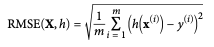

As the variable of interest is popularity on a linear scale, this project will focus on regression as part of supervised learning. As such we can limit our potential models to either linear regression, decision tree regressors, random forest regressors, SVM, SGD regressors or GBRT. We will explore linear regression, decision trees, random forests and gradient boosting.

**Model 1: Linear Regression**

In [61]:
#First we start with a simple linear regression model and fit the train data.
model1=LinearRegression()
model1=model1.fit(X_train,y_train)

In [62]:
# finding the coefficients
coeff=pd.DataFrame(model1.coef_, X_train.columns, columns=['Coefficient'])
coeff=coeff.sort_values(by=['Coefficient'],ascending=False)
coeff.head(5)

# largest coefficients for duration, loudness, explicit, danceability and time signature
# e.g. 1s increase in song increases popularity by 16

,Coefficient
log_duration,15.229899
loudness,10.200476
explicit,7.829876
danceability,4.062179
time_signature,1.445960


In [63]:
# Testing the model with a subset of the training data so we can gain a quick visual representation of how accurate the predictions are to the labels.
some_data = X_train.iloc[:10]
some_labels = y_train[:10]

In [64]:
print('predictions:', model1.predict(some_data))

predictions: [43.80602644 29.93852617 24.962131   36.42171308 37.0337818  37.53090568
 30.36483211 39.09901169 27.86379441 25.73812096]


In [65]:
print('labels:', list(some_labels))

#predictions are not entirely accurate but have some promising results for the first basic model

labels: [45, 13, 74, 50, 33, 34, 16, 63, 2, 37]


In [66]:
print("R2 of model1: {:.3f}".format(model1.score(X_train,y_train)))

R2 of model1: 0.312


In [67]:
model1_predictions = model1.predict(X_train)
model1_mse = mean_squared_error(y_train,model1_predictions)
model1_rmse = np.sqrt(model1_mse)
print("RMSE: %f" % (model1_rmse))

RMSE: 14.196261


With this basic model and as many parameters as there are possible, it would fit every single data point and become extremely flexible. This may result in highly tortuous manifolds fitting the data at every single point. We do not want a training error all the way at 0 but also do not want to induce early stopping to the point that we overfit and loose any generalisation. This is the trade-off. In this instance it is intiutive to introduce polynomial regression, which adds a power of each feature as new features to the model and trains the original linear model on this newly extended set of features.

In [68]:
poly=PolynomialFeatures(degree=2,include_bias=False)
poly

PolynomialFeatures(include_bias=False)

In [69]:
poly_x=poly.fit_transform(X_train)

In [70]:
model1.fit(poly_x,y_train)

LinearRegression()

In [71]:
poly_pred=model1.predict(poly_x)

In [72]:
poly_pred

array([48.20360027, 28.87981104, 24.33774058, ..., 38.09609   ,
       37.63983478, 37.42676467])

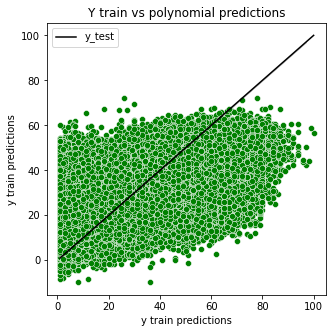

In [73]:
# visualising the predictions from polynomial regression
fig, ax = plt.subplots(figsize=(5,5))
ax = sns.scatterplot(x=y_train, y=poly_pred,color='green')
sns.lineplot(x=y_train, y=y_train, color='black', ax=ax)
plt.legend(labels=['y_test'])
ax.set_xlabel('y train predictions')
ax.set_ylabel('y train predictions')
ax.set_title('Y train vs polynomial predictions')
plt.savefig('polynomial_predictions.png')
plt.show()

In [74]:
poly_mse = mean_squared_error(y_train,poly_pred)
poly_rmse = np.sqrt(poly_mse)
print("RMSE: %f" % (poly_rmse))
# we obtain much better results from using polynomial regression to standard linear regression

RMSE: 13.791324


**Model 2: Decision Tree Regressor**

In [75]:
limited_depth = 3
model2 = DecisionTreeRegressor(max_depth=limited_depth)
# Fit the model with the train data
model2.fit(X_train,y_train)
# Print the coefficients to see how each feature is related to completion time - y variable
print(X_train.columns.tolist())
print(model2.feature_importances_)

['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'year', 'log_speechiness', 'log_duration', 'log_liveness', 'artists', 'month']
[0.         0.         0.01669278 0.         0.         0.
 0.         0.04891313 0.         0.         0.         0.93439409
 0.         0.         0.         0.         0.        ]


In [76]:
#Testing the second model on part of the training data
some_data2 = X_train.iloc[5:10]
some_labels2 = y_train[5:10]

In [77]:
print('predictions:', model2.predict(some_data2))

predictions: [38.95216418 24.81909328 38.95216418 24.81909328 24.81909328]


In [78]:
print('labels:', list(some_labels2))

labels: [34, 16, 63, 2, 37]


In [79]:
print("R2 of model2: {:.3f}".format(model2.score(X_train,y_train)))

R2 of model2: 0.319


In [80]:
model2_predictions = model2.predict(X_train)
model2_mse = mean_squared_error(y_train,model2_predictions)
model2_rmse = np.sqrt(model2_mse)
print("RMSE: %f" % (model2_rmse))

RMSE: 14.131715


In [81]:
#Deepening the tree depth, so that the model can capture greater underlying relationships within the data due to larger number of node splits.
greater_depth = 6
model2 = DecisionTreeRegressor(max_depth=greater_depth)
# Fit the model with the train data
model2.fit(X_train,y_train)
# Print the coefficients to see how each feature is related to completion time - y variable
print(X_train.columns.tolist())
print(model2.feature_importances_)

['explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'acousticness', 'instrumentalness', 'valence', 'tempo', 'time_signature', 'year', 'log_speechiness', 'log_duration', 'log_liveness', 'artists', 'month']
[4.09128859e-03 0.00000000e+00 1.49496299e-02 0.00000000e+00
 5.00477497e-03 0.00000000e+00 3.22770619e-02 4.55369568e-02
 1.95430851e-04 3.76973179e-04 0.00000000e+00 8.44315424e-01
 0.00000000e+00 1.76230728e-02 0.00000000e+00 1.91442425e-02
 1.64851444e-02]


In [82]:
model2_predictions = model2.predict(X_train)
model2_predictions

array([41.189562  , 28.67131798, 24.0532629 , ..., 37.84745341,
       37.84745341, 32.79941416])

In [83]:
print("R2 of model2: {:.3f}".format(model2.score(X_train,y_train)))

R2 of model2: 0.367


In [84]:
model2_mse = mean_squared_error(y_train,model2_predictions)
model2_rmse = np.sqrt(model2_mse)
print("RMSE: %f" % (model2_rmse))

RMSE: 13.617062


**Model 3: Random Forest Regressor**

In [85]:
#performing random forest on a training subset due to its complexity and exhaustive computerization time 
model3 = RandomForestRegressor()
model3.fit(some_data,some_labels)

RandomForestRegressor()

In [86]:
model3_predictions = model3.predict(some_data)
model3_mse = mean_squared_error(some_labels,model3_predictions)
model3_rmse = np.sqrt(model3_mse)
print("RMSE: %f" % (model3_rmse))

RMSE: 10.627422


**Model 4:Gradient boosting regressor, GBRT**

In [87]:
#import a simple gbrt with no specified parameters 
model4 = GradientBoostingRegressor()
# fit the model with the train data 
model4.fit(X_train,y_train)

GradientBoostingRegressor()

In [88]:
y_pred = model4.predict(X_test)
mean_absolute_error(y_test, y_pred)

10.75898743037576

In [89]:
model4_predictions = model4.predict(X_test)
model4_mse = mean_squared_error(y_test,model4_predictions)
model4_rmse = np.sqrt(model4_mse)
print("RMSE: %f" % (model4_rmse))

RMSE: 13.630592


**Choosing the model(s)**

Cross-validation will be run to determine the RMSE, with k=5. Once executed the code randomly splits the training data into 5 folds and evaluates each model's performance on each fold.

In [90]:
#defining a function to compute the mean rmse scores
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse = {"{:.2f}".format(rmse)}')

In [91]:
model1_scores = cross_val_score(model1,X_train,y_train,scoring='neg_mean_squared_error',n_jobs=-1)
print(f'Scores for each fold are: {model1_scores}')
rmse(model1_scores.mean())
model1_rmse=np.sqrt(-model1_scores)
model1_rmse=model1_rmse.mean()

Scores for each fold are: [-202.65685305 -200.15737089 -201.11418412 -201.74159056 -202.11781075]
rmse = 14.20


In [92]:
model2scores = cross_val_score(model2, X_train, y_train, scoring='neg_mean_squared_error', n_jobs=-1)
print(f'Scores for each fold are: {model2scores}')
rmse(model2scores.mean())
model2_rmse=np.sqrt(-model2scores)
model2_rmse=model2_rmse.mean()

Scores for each fold are: [-187.50181275 -185.30949524 -187.28721953 -186.00965282 -188.3335304 ]
rmse = 13.67


In [93]:
#using a subset of data for cross validation with random forest due to its complexity 
model3_scores = cross_val_score(model3,some_data,some_labels,scoring='neg_mean_squared_error',n_jobs=-1)
print(f'Scores for each fold are: {model3_scores}')
rmse(model3_scores.mean())
model3_rmse=np.sqrt(-model3_scores)
model3_rmse=model3_rmse.mean()

Scores for each fold are: [ -312.21145 -1462.79305  -249.64945  -760.1274   -627.3185 ]
rmse = 26.12


In [94]:
model4_scores = cross_val_score(model4,some_data,some_labels,scoring='neg_mean_squared_error',n_jobs=-1)
print(f'Scores for each fold are: {model4_scores}')
rmse(model4_scores.mean())
model4_rmse=np.sqrt(-model4_scores)
model4_rmse=model4_rmse.mean()

Scores for each fold are: [ -857.94338709 -1773.81514324  -652.82289231  -722.22294353
 -1639.95259623]
rmse = 33.61


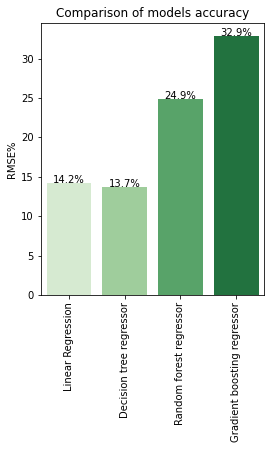

In [95]:
# visualising the models performances 
models=['Linear Regression','Decision tree regressor','Random forest regressor','Gradient boosting regressor']
scoring = [model1_rmse,model2_rmse,model3_rmse,model4_rmse]

fig, ax = plt.subplots(figsize=(4, 5))
ax = sns.barplot(x=models, y=scoring, ax=ax,palette='Greens')
plt.xticks(rotation=90)
ax.set_ylabel('RMSE%')
ax.set_title('Comparison of models accuracy')
percentage = [model1_rmse, model2_rmse, model3_rmse, model4_rmse]
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.savefig('model comparison.png')
plt.show()

# cross validation contradicts previous findings to show random forest and GBRT have worst error
# we do not yet know whether this is due to overfitting so will not rule these out entirely

### [Part 7](#Part6): Fine-tuning of potential models.

**Dimensionality reduction using PCA**

As it was found previously that there is a high degree of collinearity, although standardization can mitigate this to some extent, it is also useful to compress the data through PCA. In this way PCA can reduce the noise in the data, as well as reduce the high dimensionality.

In [96]:
print("Original shape:", X_train.shape)
# original shape is 341058 by 17, meaning it has 17 dimensions. We can make this more maneagable by reducing n. of dimensions down
# to a point that is still large enough to explain 95% of variance

Original shape: (341058, 17)


In [97]:
#set the PCA 
pca = PCA()
# fit the pca model with the train data
train_pca = pca.fit_transform(scale(X_train))
# explain the variance within the data
test_pca = pca.transform(X_test)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum>=0.95)+1
print('The ideal number of components is:',d)
#obtain the number of components whereby 95% of variance can still be obtained

The ideal number of components is: 15


In [98]:
# finding the distribution of data over the state space, there are 17 dimensions, this is highly dimensional
pca.explained_variance_ratio_

array([0.18956382, 0.08681262, 0.07212939, 0.06857556, 0.06380724,
       0.06007856, 0.05929081, 0.05868169, 0.05611867, 0.0516648 ,
       0.05088157, 0.04727075, 0.04321571, 0.0376687 , 0.02797309,
       0.01845187, 0.00781516])

In [99]:
print("transformed shape:", train_pca.shape)
# seeing if the data has changed in shape

transformed shape: (341058, 17)


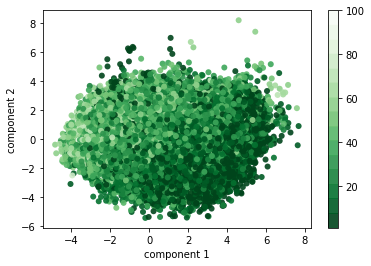

In [100]:
plt.scatter(train_pca[:, 0], train_pca[:, 1],
            c=y_train, edgecolor='none', alpha=0.9,
            cmap=plt.cm.get_cmap('Greens_r', 15))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.savefig('pca.png')
plt.colorbar()
plt.show()

# this scattermatrix shows the 17-dimensional datapoint cloud
# each point is a projection of each data point along the directions with the largest variance
# so essentially we can analyse the data in a 2dimensional format 

In [101]:
# there are 17 components 
pca.n_components_

17

In [102]:
# with the data's current shape, it can explain 99% of variance
np.sum(pca.explained_variance_ratio_)

0.9999999999999999

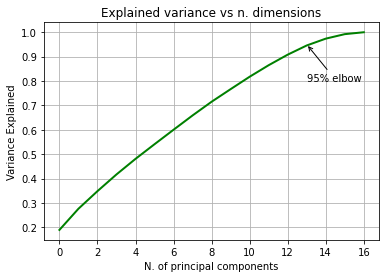

In [103]:
# plotting at which n. of principal components the 95% elbow can be obtained
plt.plot(np.arange(pca.n_components_), np.cumsum(pca.explained_variance_ratio_), 'g-', linewidth=2)
plt.title('Explained variance vs n. dimensions')
plt.xlabel('N. of principal components')
plt.ylabel('Variance Explained')
plt.grid()
plt.annotate('95% elbow',xy=(13, 0.95),xytext=(13, 0.8),arrowprops=dict(arrowstyle="->"),fontsize=10)
plt.savefig('pca_elbowcurve.png')
plt.show()

In [104]:
pca2 = PCA(n_components=d)
pca2_train=pca2.fit_transform(scale(X_train))
pca2_test=pca2.fit_transform(X_test)

print(np.sum(pca2.explained_variance_ratio_))
print(pca2.n_components_)
# there are now only 15 components at the 95% elbow

0.9999999998951917
15


**Gradient boosting regressor**

In [105]:
# formatting the x and y data for the xgboost to interpret
x=pd.concat([X_train,X_test])
y= np.concatenate((y_train, y_test))
data_dmatrix = xgboost.DMatrix(data=x,label=y)

In [106]:
# setting the parameters to test with 50 rounds of boosting
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgboost.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

In [107]:
# showing the top 5 results
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,31.371187,0.016041,31.372169,0.035217
1,29.015092,0.103581,29.016722,0.096727
2,26.812586,0.090809,26.814217,0.086055
3,24.998720,0.160702,25.000953,0.147961
4,23.302324,0.139197,23.305267,0.125794


In [108]:
xg_rmse=(cv_results["test-rmse-mean"]).tail(1)

In [109]:
print((cv_results["train-rmse-mean"]).tail(1))
print((cv_results["test-rmse-mean"]).tail(1))

49    13.506012
Name: train-rmse-mean, dtype: float64
49    13.557163
Name: test-rmse-mean, dtype: float64


In [110]:
# setting up the final boosting model with the best parameters
evaluation = [( X_train, y_train), ( X_test, y_test)]
xg_reg = xgboost.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xg_reg=xgboost.XGBRegressor()
xg_reg.fit(X_train, y_train,eval_set=evaluation, eval_metric="rmse",early_stopping_rounds=10,verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [111]:
# making the predictions
xg_pred=xg_reg.predict(X_test)
xg_pred

array([34.602116, 23.050554, 18.202362, ..., 32.53757 , 27.067453,
       25.095942], dtype=float32)

In [112]:
# determining the r2 score
xgb_score=r2_score(y_test,xg_pred, multioutput='variance_weighted')
print("R2 score:", xgb_score)

R2 score: 0.382818538242744


In [113]:
# determining the rmse
rmse_gbrt = np.sqrt(mean_squared_error(y_test, xg_pred))
print("RMSE: %f" % (rmse_gbrt))

RMSE: 13.450136


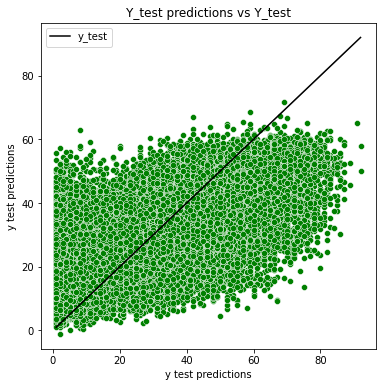

In [114]:
# visualising the predictions vs actual labels
fig, ax = plt.subplots(figsize=(6, 6))
ax = sns.scatterplot(x=y_test, y=xg_pred,color='green')
sns.lineplot(x=y_test, y=y_test, color='black', ax=ax)
plt.legend(labels=['y_test'])
ax.set_xlabel('y test predictions')
ax.set_ylabel('y test predictions')
ax.set_title('Y_test predictions vs Y_test')
plt.savefig('xgoost_predictions.png')
plt.show()
# we find the predictions are roughly accurate

**Decision tree regressor**

In [115]:
# setting the parameters to test
param_distribs = {"splitter":["best","random"],
            "max_depth": [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [116]:
# assigning the simple model
decision_tree=DecisionTreeRegressor()

In [117]:
#Due to the large dataset and therefore large search space, randomized search will be undertaken rather than grid search
# grid search evaluates all hyperparameter combinations resulting in slow results, 
# whereas randomized search allows for greater control over computerisation power and cost requirements 
random_search = RandomizedSearchCV(decision_tree, param_distributions=param_distribs,
                                   scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeRegressor(),
                   param_distributions={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.1,
                                                                     0.2, 0.3,
                                                                     0.4, 0.5],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error')

In [118]:
# determining the cross validation scores
cv_scores = random_search.cv_results_

for mean_score, params in zip(cv_scores["mean_test_score"], cv_scores["params"]):
    print(np.sqrt(-mean_score),params)
    
# the best score obtained is 15.4

17.010606727770398 {'splitter': 'random', 'min_weight_fraction_leaf': 0.4, 'min_samples_leaf': 6, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 1}
16.83844148836506 {'splitter': 'random', 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'max_leaf_nodes': 10, 'max_features': 'log2', 'max_depth': 1}
15.687406909196863 {'splitter': 'random', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 6, 'max_leaf_nodes': 30, 'max_features': 'auto', 'max_depth': 9}
14.789807366617769 {'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 5, 'max_leaf_nodes': 80, 'max_features': 'auto', 'max_depth': 11}
14.934703219656068 {'splitter': 'best', 'min_weight_fraction_leaf': 0.3, 'min_samples_leaf': 10, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': 7}
15.289522602031075 {'splitter': 'best', 'min_weight_fraction_leaf': 0.1, 'min_samples_leaf': 1, 'max_leaf_nodes': 90, 'max_features': None, 'max_depth': 1}
16.71546316190937 {'splitter': 'random', 'min_w

In [119]:
print("\n The best estimator across ALL searched params:\n", random_search.best_estimator_)


 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=5, min_weight_fraction_leaf=0.2)


In [120]:
print("\n The best parameters across ALL searched params:\n", random_search.best_params_)


 The best parameters across ALL searched params:
 {'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 5, 'max_leaf_nodes': 80, 'max_features': 'auto', 'max_depth': 11}


In [121]:
# defining a function to visualise the error according to max depth parameter, cited from (Hartmann,2020).
def max_depth_error(max_depth):
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    train_acc = 1 - model.score(X_train, y_train)
    test_acc= 1 - model.score(X_test, y_test)
    
    return {'Max Depth': max_depth, 'Training Error': train_acc, 'Test Error': test_acc}
    
errors_df = pd.DataFrame([max_depth_error(max_depth) for max_depth in range(1,15)])

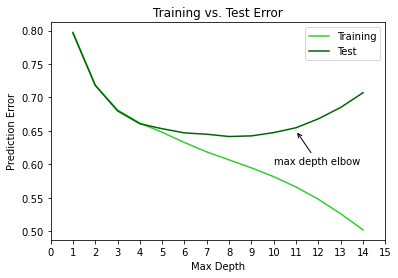

In [122]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'],color='limegreen')
plt.plot(errors_df['Max Depth'], errors_df['Test Error'],color='darkgreen')
plt.title('Training vs. Test Error')
plt.xticks(range(0,16))
plt.xlabel('Max Depth')
plt.ylabel('Prediction Error')
plt.legend(['Training','Test'])
plt.annotate('max depth elbow',xy=(11, 0.65),xytext=(10, 0.6),arrowprops=dict(arrowstyle="->"),fontsize=10)
plt.savefig('tree_depth_vs_error.png')
plt.show()

In [123]:
# finalising the model with best parameters
splitter_best = random_search.best_params_['splitter']
leaf_best=random_search.best_params_['min_weight_fraction_leaf']
min_samples_best=random_search.best_params_['min_samples_leaf']
max_leaf_best=random_search.best_params_['max_leaf_nodes']
max_features_best = random_search.best_params_['max_features']
max_depth_best = random_search.best_params_['max_depth']

tree = DecisionTreeRegressor(splitter=splitter_best,
            max_depth=max_depth_best,
           max_leaf_nodes=max_leaf_best,
           max_features=max_features_best,
           min_samples_leaf=min_samples_best)

tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, max_features='auto', max_leaf_nodes=80,
                      min_samples_leaf=5)

In [124]:
tree_results = pd.DataFrame(random_search.cv_results_)
tree_results=tree_results.sort_values(by='rank_test_score',ascending=True)
tree_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_weight_fraction_leaf,param_min_samples_leaf,param_max_leaf_nodes,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.578428,0.003429,0.007156,0.000132,best,0.2,5,80,auto,11,"{'splitter': 'best', 'min_weight_fraction_leaf...",-219.928121,-217.096794,-218.572031,-218.555024,-219.540039,-218.738402,0.981248,1
4,0.467844,0.002378,0.006915,0.000054,best,0.3,10,None,None,7,"{'splitter': 'best', 'min_weight_fraction_leaf...",-224.286934,-220.944600,-223.127314,-222.451197,-224.416756,-223.045360,1.280248,2
5,0.302697,0.002285,0.006738,0.000218,best,0.1,1,90,None,1,"{'splitter': 'best', 'min_weight_fraction_leaf...",-235.149478,-231.591502,-233.707755,-233.245009,-235.153762,-233.769501,1.329895,3


In [125]:
# finding the final r2 score
dtree_pred=tree.predict(X_test)
dtree_score=r2_score(y_test,dtree_pred, multioutput='variance_weighted')
print("R2 score:", dtree_score)

R2 score: 0.3621514154121623


In [126]:
# finding the final rmse 
rmse_dtree = np.sqrt(mean_squared_error(y_test, dtree_pred))
print("RMSE: %f" % (rmse_dtree))

RMSE: 13.673480


**Random forest regressor**

In [127]:
# assigning the basic random forest model to be tuned
model = RandomForestRegressor()

In [128]:
# setting the parameters for search
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4]
min_samples_split = [2, 5]
min_samples_leaf = [1, 2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [129]:
# setting up the random search, set cv to 10 which totals 100 fits
rnd_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [130]:
# fitting the search with the train data
rnd_search.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [10, 17, 25, 33, 41, 48,
                                                         56, 64, 72, 80]},
                   verbose=2)

In [131]:
print("\n The best parameters across ALL searched params:\n", rnd_search.best_params_)


 The best parameters across ALL searched params:
 {'n_estimators': 56, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': True}


In [132]:
print (f'Train Accuracy : {rnd_search.score(X_train,y_train):.3f}')
print (f'Test Accuracy : {rnd_search.score(X_test,y_test):.3f}')

Train Accuracy : 0.343
Test Accuracy : 0.343


In [133]:
results = pd.DataFrame(rnd_search.cv_results_)
results=results.sort_values(by='rank_test_score',ascending=True)
results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,51.285309,0.216652,0.062392,0.001469,56,5,2,auto,4,True,...,0.333341,0.340408,0.343502,0.344650,0.346169,0.339412,0.347508,0.342300,0.004394,1
6,65.920549,0.236475,0.078269,0.000530,72,2,1,auto,4,True,...,0.332945,0.340202,0.344086,0.345132,0.345666,0.339157,0.348135,0.342289,0.004598,2
2,13.089808,0.069788,0.015771,0.000899,10,5,1,auto,4,False,...,0.327916,0.334076,0.338968,0.340472,0.341365,0.334200,0.342398,0.337032,0.004688,3
0,5.593085,0.098475,0.022984,0.002853,17,2,1,sqrt,4,False,...,0.303211,0.310548,0.305356,0.311440,0.310267,0.307263,0.300728,0.303471,0.009050,4
4,11.395374,0.134792,0.052491,0.001387,48,5,2,sqrt,4,True,...,0.293153,0.296830,0.289594,0.301082,0.305183,0.302785,0.301219,0.299907,0.005449,5


In [134]:
# finalising the test model with best parameters
bootstrap_best = rnd_search.best_params_['bootstrap']
n_best=rnd_search.best_params_['n_estimators']
min_samples_best=rnd_search.best_params_['min_samples_leaf']
min_split_best=rnd_search.best_params_['min_samples_split']
max_features_best = rnd_search.best_params_['max_features']
max_depth_best = rnd_search.best_params_['max_depth']

rf = RandomForestRegressor(n_estimators=n_best,
            max_depth=max_depth_best,
           min_samples_split=min_split_best,
           bootstrap=bootstrap_best,
           max_features=max_features_best,
           min_samples_leaf=min_samples_best)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=56)

In [135]:
# determining the final r2 score
rf_pred=rnd_search.predict(X_test)
rf_score=r2_score(y_test,rf_pred, multioutput='variance_weighted')
print("R2 score:", rf_score)

R2 score: 0.3429962197358378


In [136]:
#determining the final rmse
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
print("RMSE: %f" % (rmse_rf))

RMSE: 13.877275


**Choosing the final model**

In [137]:
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test,rf_pred)
rmse_rf = np.sqrt(rf_mse)

In [138]:
tree_pred = tree.predict(X_test)
tree_mse = mean_squared_error(y_test,tree_pred)
rmse_tree = np.sqrt(tree_mse)

In [139]:
xg_mse = mean_squared_error(y_test,xg_pred)
rmse_xg = np.sqrt(xg_mse)

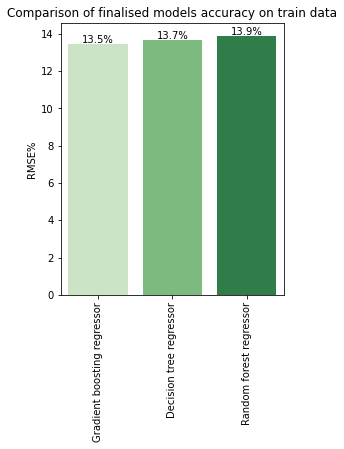

In [140]:
models=['Gradient boosting regressor','Decision tree regressor','Random forest regressor']
scoring = [rmse_xg,rmse_tree,rmse_rf]

fig, ax = plt.subplots(figsize=(4, 5))
ax = sns.barplot(x=models, y=scoring, ax=ax,palette='Greens')
plt.xticks(rotation=90)
ax.set_ylabel('RMSE%')
ax.set_title('Comparison of finalised models accuracy on train data')
percentage = [rmse_xg, rmse_tree, rmse_rf]
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+.05
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
plt.savefig('final model comparison.png')
plt.show()

# been able to reduce the rmse of each model - most notably for GBRT and random forest 

### [Part 8](#Part8): Present your final solution with any summary conclusions.

In [141]:
#assigning the final model with xgboost as it performs the best with smallest error
final_model=xg_reg

In [142]:
#making final predictions
predictions=final_model.predict(X_test)
predictions

array([34.602116, 23.050554, 18.202362, ..., 32.53757 , 27.067453,
       25.095942], dtype=float32)

In [143]:
# determining final error
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
print('final rmse:',final_rmse)

final rmse: 13.45013637020807


In [144]:
# finalising the pipeline for future use
full_pipeline_with_predictor = Pipeline([
        ("preparation", pipeline),
        ("model", final_model)
    ])

In [145]:
# saving the model 
joblib.dump(full_pipeline_with_predictor,'final_model.pkl')

['final_model.pkl']

In [146]:
# loading the model
final_model = joblib.load('final_model.pkl')
final_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('cat', LabelEncoder(),
                                                  ['artists', 'month']),
                                                 ('num', MinMaxScaler(),
                                                  ['explicit', 'danceability',
                                                   'energy', 'key', 'loudness',
                                                   'mode', 'acousticness',
                                                   'instrumentalness',
                                                   'valence', 'tempo',
                                                   'time_signature', 'year',
                                                   'log_speechiness',
                                                   'log_duration',
                                                   'log_liveness'])])),
                ('model',
                 XGBRegressor(base_score=...
                

In [147]:
# showing final scores across all metrics
print('MAE:', mean_absolute_error(y_test, predictions))
print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))
print('r2_score:',r2_score(y_test, predictions))

MAE: 10.60333230650957
MSE: 180.9061683771939
RMSE: 13.45013637020807
r2_score: 0.38281853824274403


In [148]:
# we are 95% confident that the rmse is between 13.3 and 13.5
confidence = 0.95
squared_errors = (predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([13.38031552, 13.51959664])

In [149]:
# testing the model on a single song 
song=X_test.iloc[100:101]
def predict_popularity(song):
    pred=xg_reg.predict(song)
    if pred <50:
        print('Unpopular:\t', pred.round(1),'%')
    elif pred > 50:
        print('Popular:\t', pred.roun(1),'%')

In [150]:
predict_popularity(song)

Unpopular:	 [31.] %


In [151]:
test_set.iloc[100:101]
# we find that the prediction is roughly correct, is only off by 4%

,name,popularity,explicit,artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,valence,tempo,time_signature,year,month,log_speechiness,log_duration,log_liveness
291293,Mia Sinousia Mistiki,35,0,['Pix Lax'],0.721,0.506,7,-10.745,1,0.244,0.000001,0.56,114.471,6,1998,Mar,0.040854,5.632286,0.125751


In [152]:
# exporting the predictions to a csv file
pd.DataFrame(predictions).to_csv("final_predictions.csv")

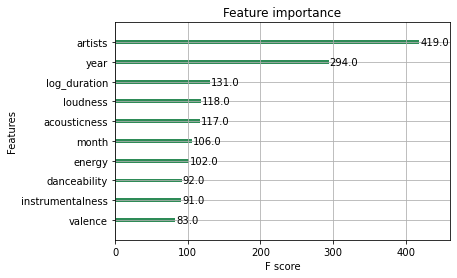

In [153]:
xgboost.plot_importance(xg_reg,max_num_features=10,color='seagreen')
plt.rcParams['figure.figsize'] = [7,7]
plt.savefig('feature_importances.png')
plt.show()

In [154]:
# Finding the top 10 songs of dataset
best_artists = df.sort_values(by='popularity', ascending=False)

best_artists.loc[:,'artist'] = best_artists['artists'].map(lambda x: x.replace('[', '').replace(']', '').replace('\'', ''))

best_artists = pd.DataFrame(best_artists[['name', 'artist', 'popularity', 'year','month','duration_ms','acousticness','energy','danceability','instrumentalness','valence','loudness']].head(10))

best_artists.head(10)
# all of the top songs are released from 2020 onwards, which may suggest there is a relationship here

,name,artist,popularity,year,month,duration_ms,acousticness,energy,danceability,instrumentalness,valence,loudness
93802,Peaches (feat. Daniel Caesar & Giveon),"Justin Bieber, Daniel Caesar, Giveon",100,2021,Mar,198082,0.32100,0.696,0.677,0.000000,0.464,-6.181
93803,drivers license,Olivia Rodrigo,99,2021,Jan,242014,0.72100,0.436,0.585,0.000013,0.132,-8.761
93804,Astronaut In The Ocean,Masked Wolf,98,2021,Jan,132780,0.17500,0.695,0.778,0.000000,0.472,-6.865
92810,Save Your Tears,The Weeknd,97,2020,Mar,215627,0.02120,0.826,0.680,0.000012,0.644,-5.487
92811,telepatía,Kali Uchis,97,2020,Dec,160191,0.11200,0.524,0.653,0.000000,0.553,-9.016
93805,Leave The Door Open,"Bruno Mars, Anderson .Paak, Silk Sonic",96,2021,Mar,242096,0.18200,0.616,0.586,0.000000,0.719,-7.964
92813,Blinding Lights,The Weeknd,96,2020,Mar,200040,0.00146,0.730,0.514,0.000095,0.334,-5.934
92814,The Business,Tiësto,95,2020,Sep,164000,0.41400,0.620,0.798,0.019200,0.235,-7.079
92816,Heartbreak Anniversary,Giveon,94,2020,Mar,198371,0.52400,0.465,0.449,0.000001,0.543,-8.964
92819,Bandido,"Myke Towers, Juhn",94,2020,Dec,232853,0.12200,0.617,0.713,0.000000,0.682,-4.637


## Conclusion

After experimenting with several models, we were able to obtain the best results using a gradient boosting decision tree using the XGBoost package, such that will be useful for implementation within the organisation's existing pipeline. It is clear that spending a significant time tuning hyperparameters is essential in developing the best model and you cannot assume a model will be less effective than another until after it has been tuned. Most importantly we find that in order for a song to have a high level of popularity, there are several indicators:

- Rather unsurpisingly the artist must already be popular
- The song must be relatively new, and we find the top 10 songs are released from 2020 onwards
- Suprisingly, the less instrumental a song is, the more popular it is
- A louder song is more desirable
- A happier song is more desirable

Although this report has given some interesting insights that can advantage the marketing team at Spotify, there are also some limitations to consider. If this were to be an ongoing project, it could be useful to look to bring in additional features, such as song genres and how specific demographic and psychographic groups tastes differ. It is also noteworthy that the next steps could be towards developing an ensemble to further improve the model, such as a voting regressor which could combine several models. Below we will create a simple ensemble as an example as to how this could be implemented and visualise the results.

In [155]:
# fit a simple voting regressor
ensemble=VotingRegressor(estimators=[('rf', rf), ('dt', tree), ('xg', xg_reg)])
ensemble.fit(X_test,y_test)
#make predictions
predictions=ensemble.predict(X_test)

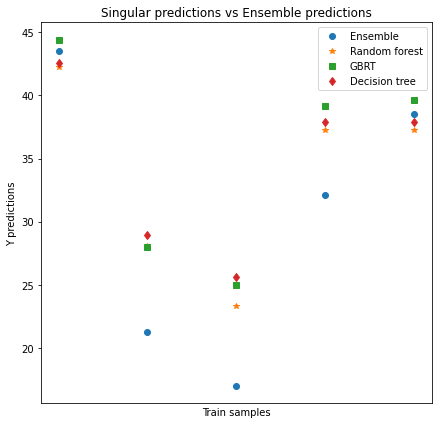

In [156]:
# visualise the predictions 
x_sample=X_train[:5]
pred=ensemble.predict(x_sample)
pred2=rf.predict(x_sample)
pred3=xg_reg.predict(x_sample)
pred4=tree.predict(x_sample)
plt.plot(pred, "o", ms=6, label="Ensemble")
plt.plot(pred2, "*", ms=6, label='Random forest')
plt.plot(pred3, 's',ms=6,label='GBRT')
plt.plot(pred4, 'd',ms=6,label='Decision tree')
plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("Y predictions")
plt.xlabel("Train samples")
plt.legend(loc='best')
plt.title("Singular predictions vs Ensemble predictions")
plt.savefig('model_prediction_comparisons.png')
plt.show()
# the ensemble tends to make lower predictions than the alternate models

### References.

Baer, J. and Ngahane, S., 2022. The Winding Road to Better Machine Learning Infrastructure Through Tensorflow Extended and Kubeflow. [online] Spotify Engineering. Available at: <https://engineering.atspotify.com/2019/12/the-winding-road-to-better-machine-learning-infrastructure-through-tensorflow-extended-and-kubeflow/> [Accessed 3 February 2022].

Edmundson, A., 2022. The Rise (and Lessons Learned) of ML Models to Personalize Content on Home (Part II). [online] Spotify Engineering. Available at: <https://engineering.atspotify.com/2021/11/the-rise-and-lessons-learned-of-ml-models-to-personalize-content-on-home-part-ii/> [Accessed 7 February 2022].

Géron, A. and Demarest, R., 2019. Hands-on machine learning with Scikit-Learn and TensorFlow. Sebastopol (Clif.) [etc.]: O'Reilly.
[Accessed 09 February 2022].


Hartmann, D., 2020. Spotify-dataset-analysis-160kTracks-1921-2020/Spotify_160k_1921_2020_analysis.ipynb at master · ddhartma/Spotify-dataset-analysis-160kTracks-1921-2020. [online] GitHub. Available at: <https://github.com/ddhartma/Spotify-dataset-analysis-160kTracks-1921-2020/blob/master/Spotify_160k_1921_2020_analysis.ipynb> [Accessed 10 March 2022].

## Appendix.
### Key features which are extracted via Spotify's API documentation :

**id**: A unique identifier.

**name**: The song name. 

**popularity**: The popularity of a given track, on a scale of 0-100.

**duration_ms**: duration in milliseconds, which has been converted into seconds.

**explicit**: A binary variable which defines whether a track contains explicit content or not (1 = explicit, 0 = non explicit).

**artists**: The corrosponding artists whom the tracks belong to.

**id_artists**: Unique id for each artist.

**release_date**: The date at which each particular track was first released. In long format.

**danceability**: A continuous measurement which defines whether a track is danceable or not ranging from 0 to 1 (1 = danceable, 0 = not danceable).

**energy**: A continuous measurement which defines whether a track is energetic or not ranging from 0 to 1 (1 = high energy, 0 = low/no energy). 'Typically, energetic tracks feel fast, loud, and noisy'.

**key**: The primary key of the track. Integers from 0 to 11 define each pitch class notation (0 = C, 1 = C# and so on).

**loudness**: The overall loudness of a track in decibels (dB) represented as a float from -60 to 0.

**mode**: A binary variable which defines whether a track is in major or minor modality (0 = minor, 1 = major).

**speechiness**:  A continuous measurement which defines a presence of spoken words in a track ranging from 0 to 1 (1 = highly present, 0 = low presence).

**acousticness**: A measurement of whether a track is acoustic or not ranging from 0 to 1 (0 = non acoustic, 1 = highly acoustic).

**instrumentalness**: Determines whether a track contains no vocals. On a scale of 0 to 1, whereby the closer the instrumentalness is to 1, the greater likelihood the track contains no vocal content.

**liveness**: Whether a track was performed live or not, on a scale from 0 to 1. A higher liveness value represents an increased probability that the track was performed live, whereby a value greater than 0.8 is likely to have been performed live.

**valence**: The positiveness of a track, ranging from 0 to 1 (0 = low valence, 1 = high valence).

**tempo**: The tempo of a track in beats per minute (BPM), ranging from 50 to 150.

**time_signature**: The time signature of a track, intention is to range from 3 to 7 indicating time signatures of "3/4", to "7/4". However, the uncleaned data ranges from 1 to 5, so this has been transformed accordingly.